In [1]:
import nltk

In [2]:
import seaborn

In [3]:
seaborn

<module 'seaborn' from 'c:\\Users\\Admin\\anaconda3\\lib\\site-packages\\seaborn\\__init__.py'>

In [4]:
nltk

<module 'nltk' from 'c:\\Users\\Admin\\anaconda3\\lib\\site-packages\\nltk\\__init__.py'>

In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [6]:
import numpy as np
import pandas as pd

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from nltk.corpus import stopwords
from collections import Counter
import string
import re

import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

In [15]:
is_cuda = torch.cuda.is_available()
is_cuda

False

In [16]:
if is_cuda:
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
    print('GPU is not available, CPU used')

GPU is not available, CPU used


In [17]:
file_name = r"IMDB Dataset 1.csv"

In [18]:
df = pd.read_csv(file_name)

In [19]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [20]:
len(df)

50000

In [22]:
X, y = df['review'].values, df['sentiment'].values
X_train, X_test = train_test_split(X, test_size=0.2)
y_train, y_test = train_test_split(y, test_size=0.2)

<AxesSubplot: >

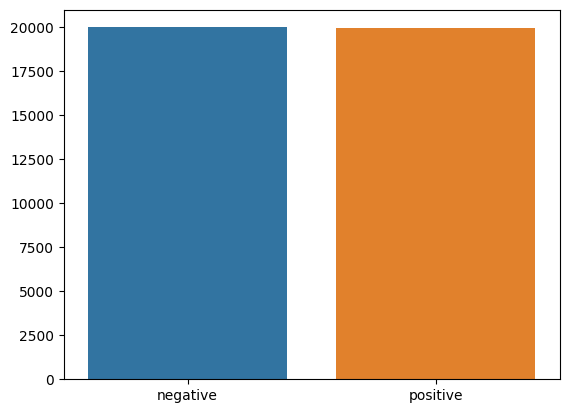

In [28]:
dd = pd.Series(y_train).value_counts()
sns.barplot(x=np.array(['negative', 'positive']), y=dd.values)

In [29]:
def preprocess(s):
    s = re.sub(r"[^\W\s]", "", s)
    s = re.sub(r"\s+", "", s)
    s = re.sub(r"\d", "", s)
    return s

In [32]:
def tokenize(x_train, y_train, x_val, y_val):
    word_list = []

    stop_words = set(stopwords.words('english'))
    for sent in x_train:
        for word in sent.lower().split():
            word=preprocess(word)
            if word not in stop_words and word != "":
                word_list.append(word)

    corpus = Counter(word_list)

    # sorting on the basis of the most common words
    corpus_ = sorted(corpus, key=corpus.get, reverse=True)[:1000]

    onehot_dict = {w: i+1 for i,w in enumerate(corpus_)}

    final_list_train, final_list_test = [], []
    for sent in x_train:
        final_list_train.append(onehot_dict[preprocess(word)] for word in sent.lower().split() if preprocess(word) in onehot_dict.keys())
    for sent in x_val:
        final_list_test.append(onehot_dict[preprocess(word)] for word in sent.lower().split() if preprocess(word) in onehot_dict.keys())

    encoded_train = [1 if label == "positive" else 0 for label in y_train]
    encoded_test = [1 if label == "positive" else 0 for label in y_val]

    return np.array(final_list_train), np.array(encoded_train), np.array(final_list_test), \
        np.array(encoded_test), onehot_dict


In [33]:
x_train, y_train, x_test, y_test, vocab = tokenize(X_train, y_train, X_test, y_test)

In [34]:
rev_len = [len(i) for i in x_train]
pd.Series(rev_len).hist()

TypeError: object of type 'generator' has no len()

In [35]:
x_train

array([<generator object tokenize.<locals>.<genexpr> at 0x0000025C3FE7A8F0>,
       <generator object tokenize.<locals>.<genexpr> at 0x0000025C3FE7B610>,
       <generator object tokenize.<locals>.<genexpr> at 0x0000025C3FE7B530>,
       ...,
       <generator object tokenize.<locals>.<genexpr> at 0x0000025C6E5F4510>,
       <generator object tokenize.<locals>.<genexpr> at 0x0000025C6E5F4580>,
       <generator object tokenize.<locals>.<genexpr> at 0x0000025C6E5F45F0>],
      dtype=object)